<h2>Introduction

The purpose of this notebook is to the explore the Car price dataset presented on Kaggle. We will use this Notebook to apply various machine learning models to predict car price.

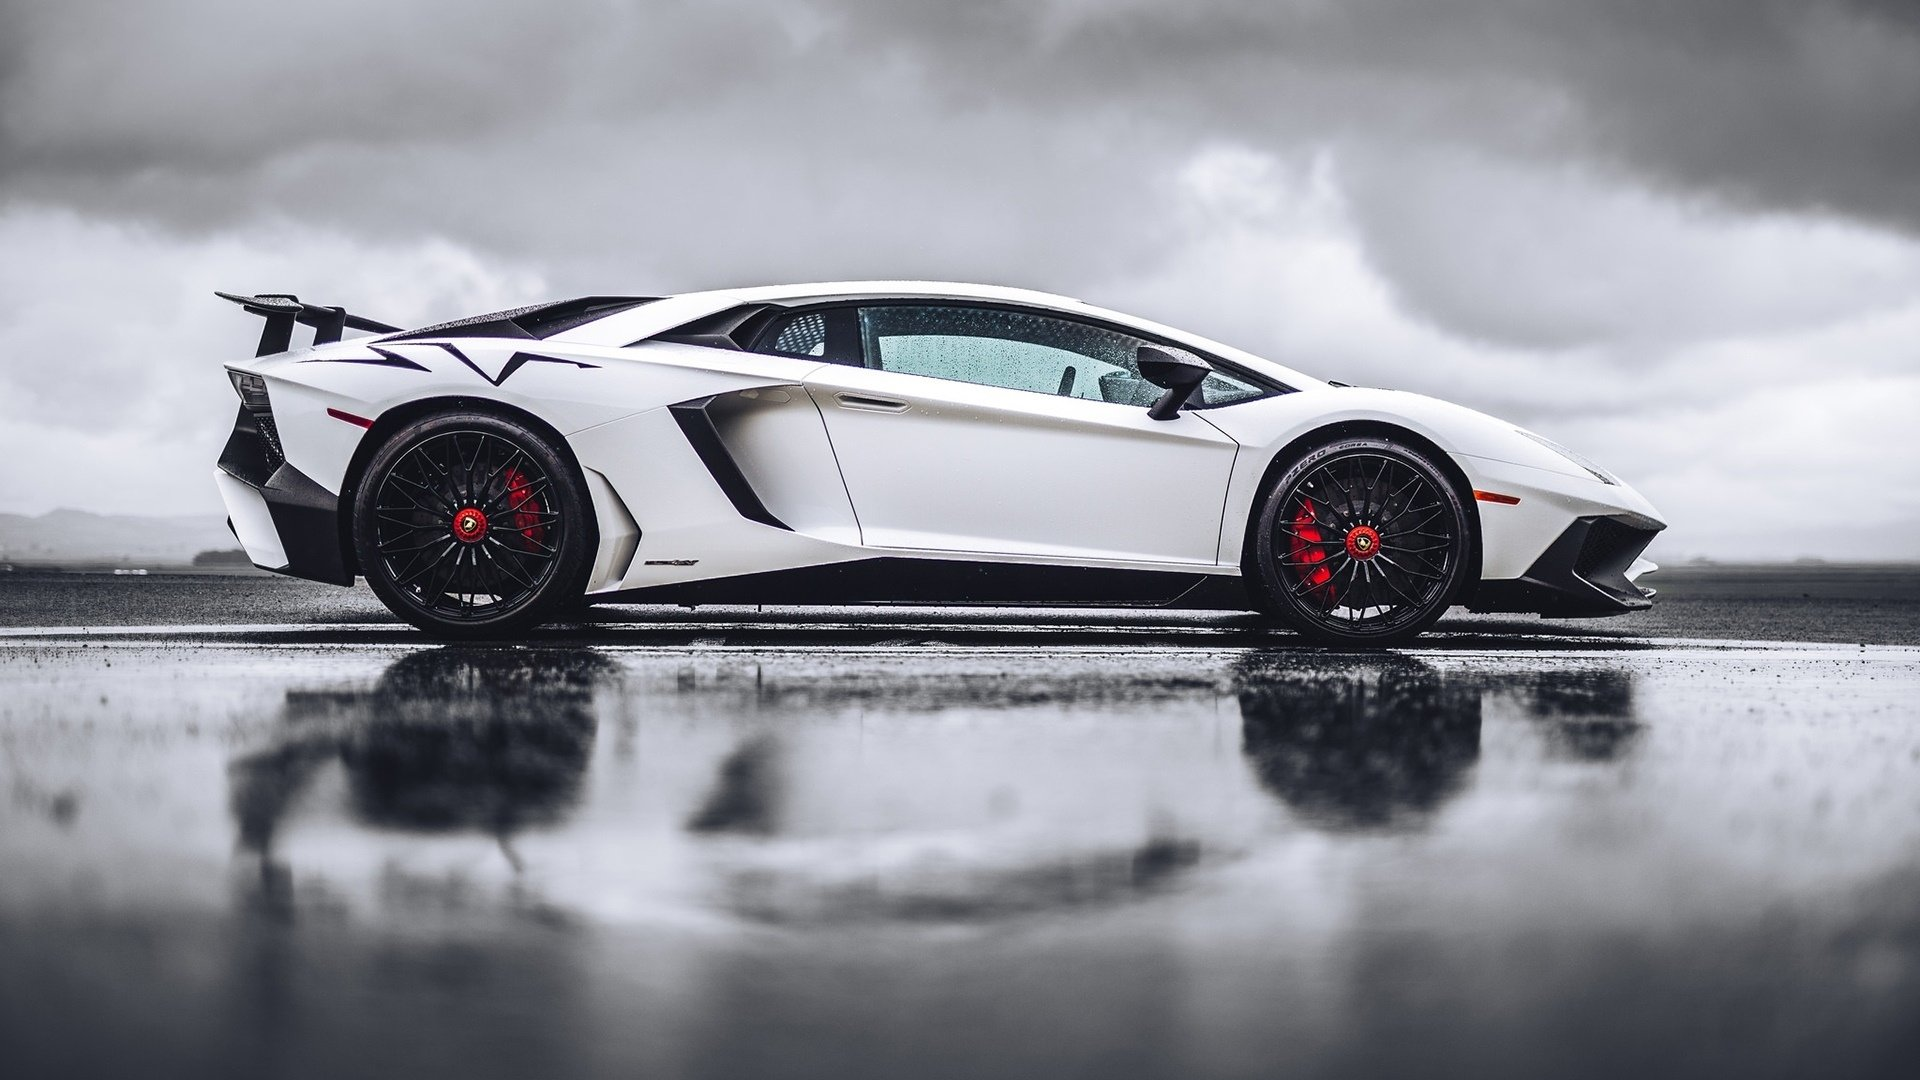

<h3>The Data

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt  
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm
import pylab
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn import preprocessing
from sklearn.svm import SVR
import skopt
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.tree import export_graphviz
from IPython.display import display, Image
import pydotplus
from glob import glob
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import ElasticNet
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import rfecv
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\data science learning\7. Projects\10. Car price\CarPrice.csv")

In [3]:
df.shape

(205, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<h5> Checking for missing values

In [6]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [7]:
missing_zero_values_table(df)

Your selected dataframe has 26 columns and 205 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Conclusion- 
There are no missing values in our dataset

In [8]:
#Seperating numerical and categorical data
cols = df.columns
num_cols = df._get_numeric_data().columns
categorical_list = list(set(cols) - set(num_cols))
categ_df = df[categorical_list]
categ_df.head()

,doornumber,CarName,enginetype,fueltype,carbody,cylindernumber,enginelocation,drivewheel,fuelsystem,aspiration
0,two,alfa-romero giulia,dohc,gas,convertible,four,front,rwd,mpfi,std
1,two,alfa-romero stelvio,dohc,gas,convertible,four,front,rwd,mpfi,std
2,two,alfa-romero Quadrifoglio,ohcv,gas,hatchback,six,front,rwd,mpfi,std
3,four,audi 100 ls,ohc,gas,sedan,four,front,fwd,mpfi,std
4,four,audi 100ls,ohc,gas,sedan,five,front,4wd,mpfi,std


In [9]:
num_df = df[num_cols]
num_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<h4>EDA</h4>

<h5> Univariate Analysis of categorical features </h5>

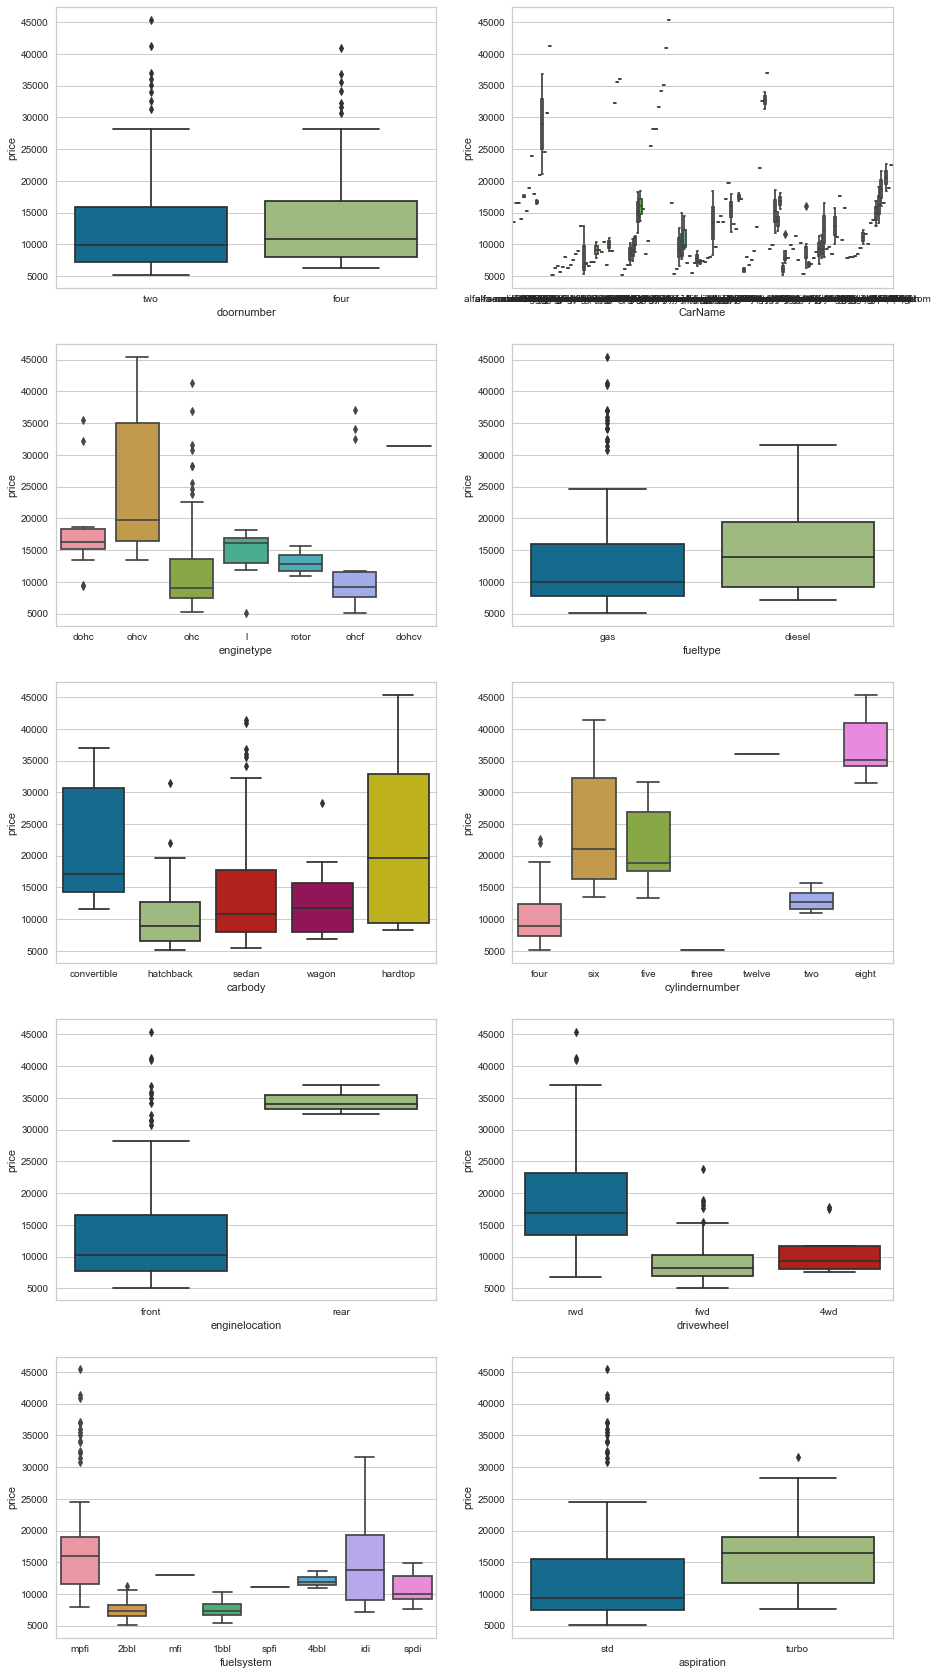

In [10]:
# Plotting box plots for categorical variables to see the distribution of data points 
fig, ax = plt.subplots(5, 2, figsize=(15, 30))
for var, subplot in zip(categ_df, ax.flatten()):
    sns.boxplot(x=var, y=num_df['price'], data=categ_df, ax=subplot)

Conclusion-
1. Fueltype,enginelocation,aspiration can be label encoded
2. doornumber can be onehot encoded 

<h5> categorical encodings

In [11]:
encoder = ce.OrdinalEncoder(cols=['fueltype','enginelocation','aspiration','enginetype','drivewheel','cylindernumber','carbody',''],return_df=True,mapping=[{'col':'fueltype','mapping':{'gas':1,'diesel':2}},{'col':'enginelocation','mapping':{'front':1,'rear':2}},{'col':'aspiration','mapping':{'std':1,'turbo':2}},{'col':'enginetype','mapping':{'ohc':1,'ohcf':2,'rotor':3,'dohc':4,'l':5,'ohcv':6}},{'col':'drivewheel','mapping':{'fwd':1,'4wd':2,'rwd':3}},{'col':'cylindernumber','mapping':{'three':1,'four':2,'two':3,'five':4,'six':5,'six':6,'eight':7,'twelve':8}},{'col':'carbody','mapping':{'hatchback':1,'sedan':2,'wagon':3,'convertible':4,'hardtop':5}}])
categ_df_encoded = encoder.fit_transform(categ_df)
categ_df_encoded.head()

,doornumber,CarName,enginetype,fueltype,carbody,cylindernumber,enginelocation,drivewheel,fuelsystem,aspiration
0,two,alfa-romero giulia,4.0,1,4,2,1,3,mpfi,1
1,two,alfa-romero stelvio,4.0,1,4,2,1,3,mpfi,1
2,two,alfa-romero Quadrifoglio,6.0,1,1,6,1,3,mpfi,1
3,four,audi 100 ls,1.0,1,2,2,1,1,mpfi,1
4,four,audi 100ls,1.0,1,2,4,1,2,mpfi,1


In [12]:
categ_df_encoded['doornumber'] = categ_df_encoded['doornumber'].apply(lambda x: 1 if x == 'two' else 2)
categ_df_encoded.head()

,doornumber,CarName,enginetype,fueltype,carbody,cylindernumber,enginelocation,drivewheel,fuelsystem,aspiration
0,1,alfa-romero giulia,4.0,1,4,2,1,3,mpfi,1
1,1,alfa-romero stelvio,4.0,1,4,2,1,3,mpfi,1
2,1,alfa-romero Quadrifoglio,6.0,1,1,6,1,3,mpfi,1
3,2,audi 100 ls,1.0,1,2,2,1,1,mpfi,1
4,2,audi 100ls,1.0,1,2,4,1,2,mpfi,1


In [13]:
encoder=ce.TargetEncoder() 
categ_df_encoded['fuelsystem'] = encoder.fit_transform(categ_df_encoded['fuelsystem'],df['price'])
categ_df_encoded.head()

,doornumber,CarName,enginetype,fueltype,carbody,cylindernumber,enginelocation,drivewheel,fuelsystem,aspiration
0,1,alfa-romero giulia,4.0,1,4,2,1,3,17754.60284,1
1,1,alfa-romero stelvio,4.0,1,4,2,1,3,17754.60284,1
2,1,alfa-romero Quadrifoglio,6.0,1,1,6,1,3,17754.60284,1
3,2,audi 100 ls,1.0,1,2,2,1,1,17754.60284,1
4,2,audi 100ls,1.0,1,2,4,1,2,17754.60284,1


In [14]:
del categ_df_encoded['CarName']

In [15]:
missing_zero_values_table(categ_df_encoded)

Your selected dataframe has 9 columns and 205 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [16]:
del num_df['car_ID']

<h5> Checking for outliers

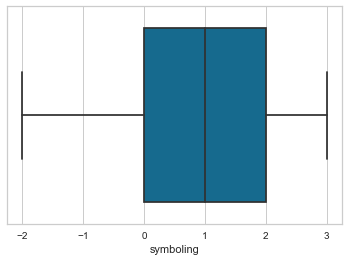

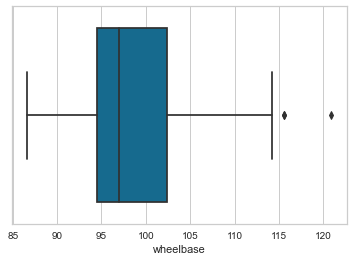

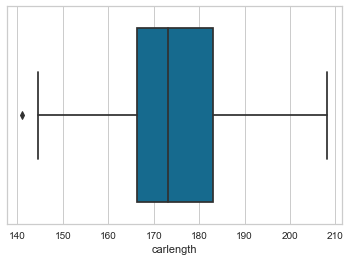

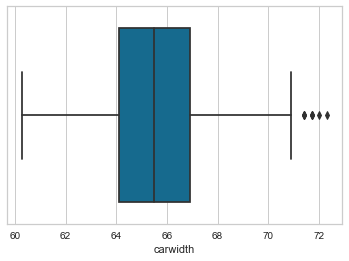

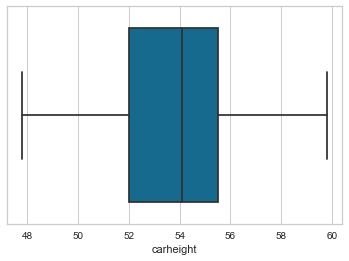

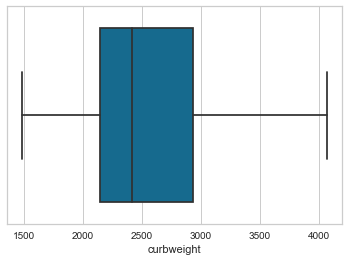

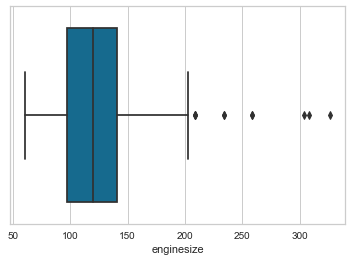

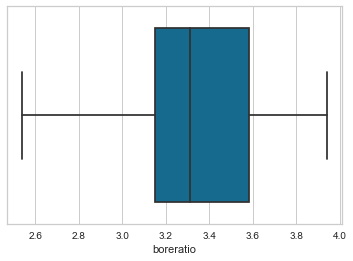

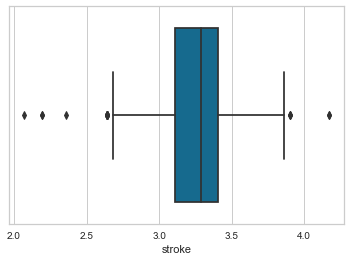

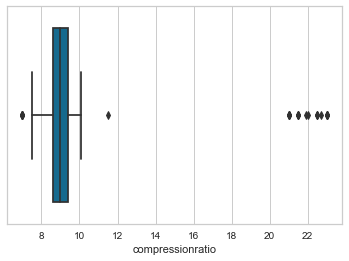

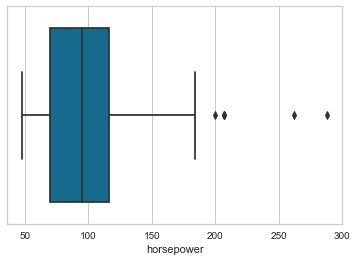

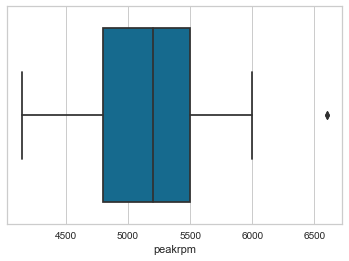

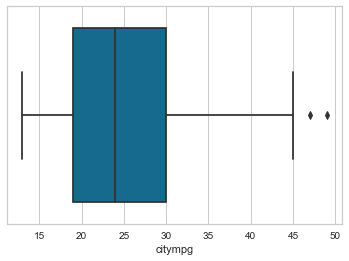

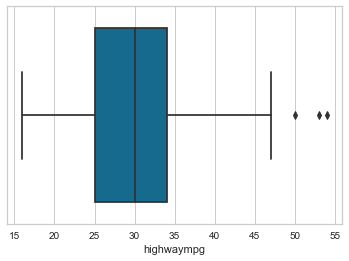

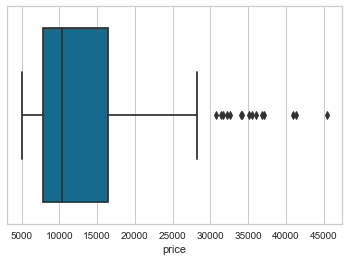

In [17]:
for i in num_df:
    sns.boxplot(x=num_df[i])
    plt.xlabel(i)
    plt.show()


<h5> Removing outliers

In [18]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [19]:
for i in num_df:
    lowerbound,upperbound = outlier_treatment(num_df[i])
    for j in range(len(num_df[i])):
        if ((num_df[i].iloc[j] > upperbound)  | (num_df[i].iloc[j] < lowerbound)):
            a = num_df[i].median()
            num_df[i] = num_df[i].replace(num_df[i].iloc[j],a)

C:\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

As we can see outliers have been removed using 25th and 75th quartiles

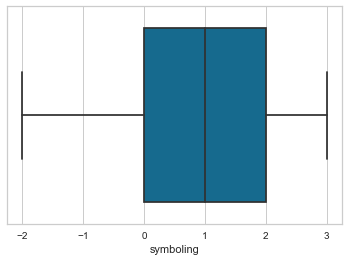

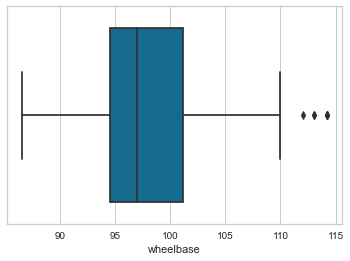

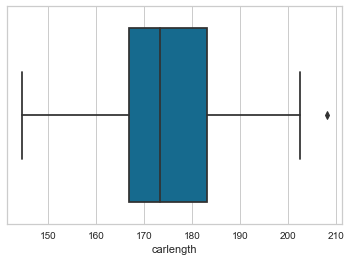

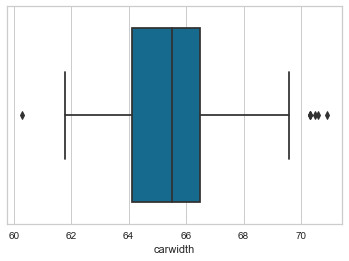

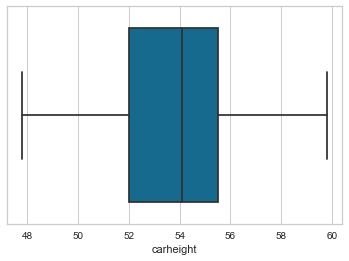

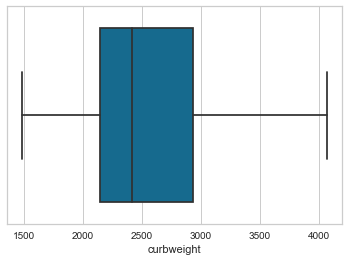

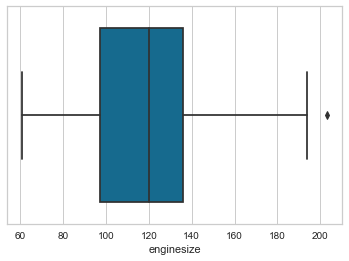

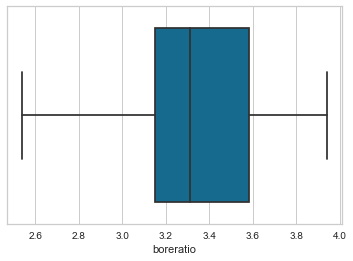

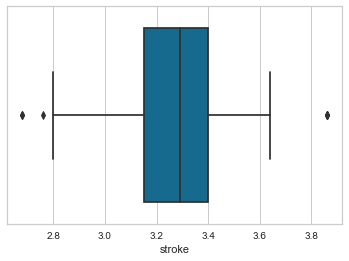

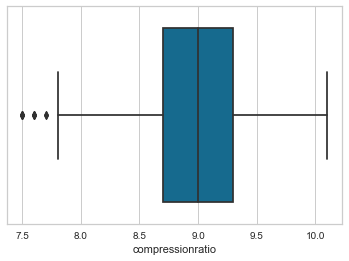

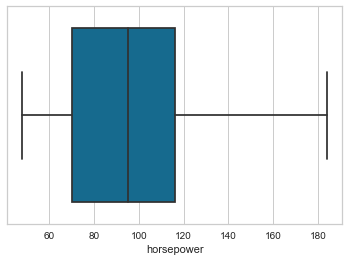

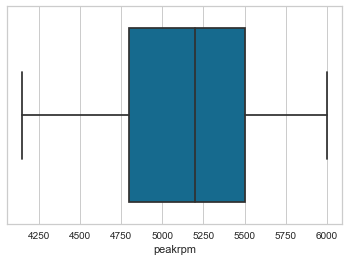

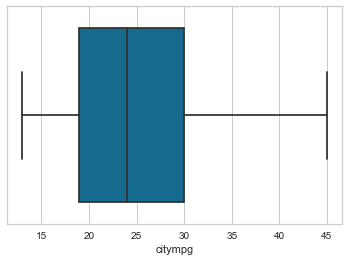

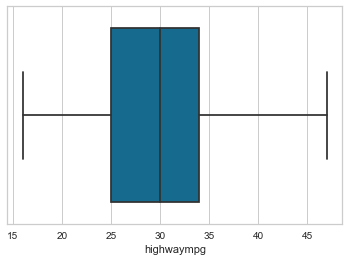

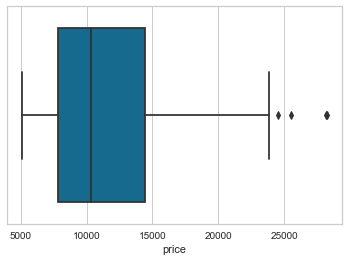

In [20]:
for i in num_df:
    sns.boxplot(x=num_df[i])
    plt.xlabel(i)
    plt.show()

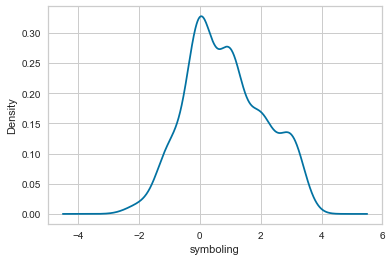

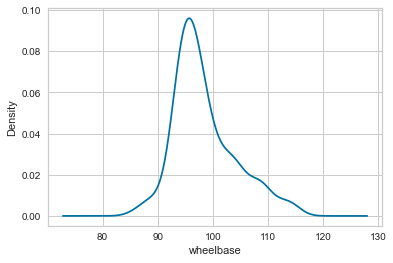

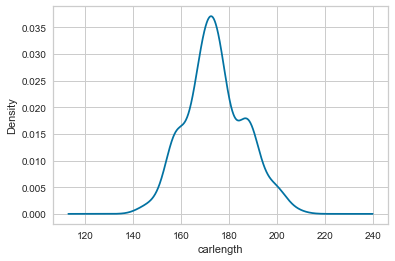

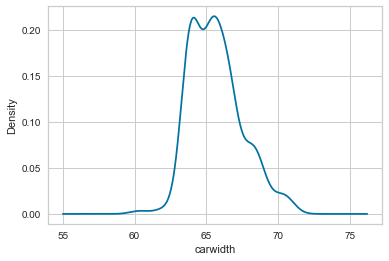

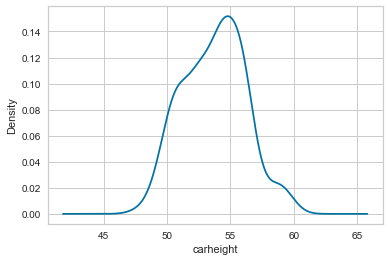

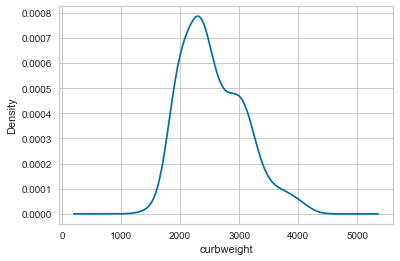

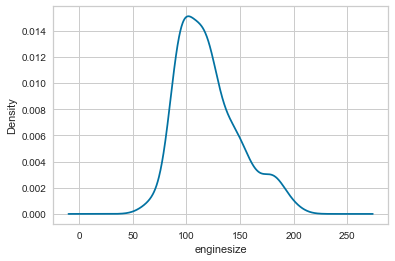

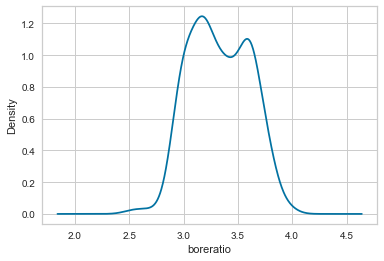

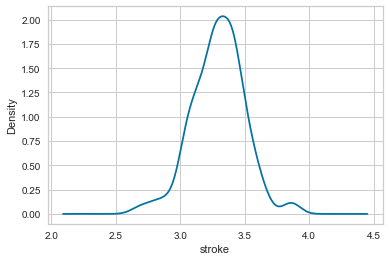

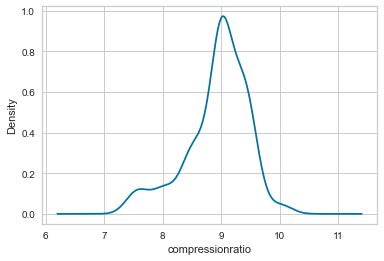

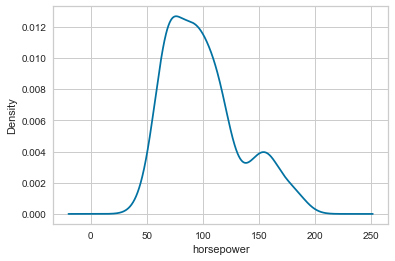

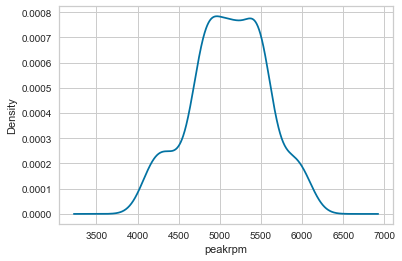

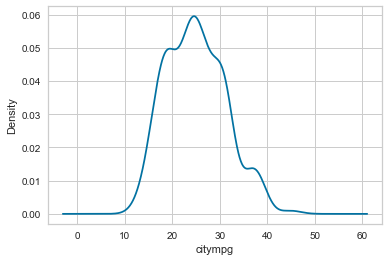

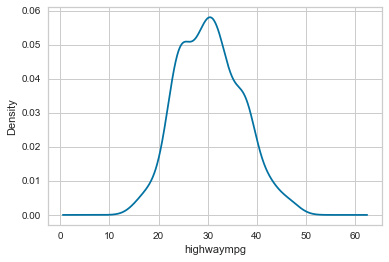

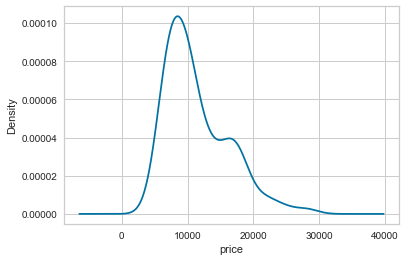

In [21]:
for i in num_df:
    num_df[i].plot.density()
    plt.xlabel(i)
    plt.show()

<h5> feature engineering new feature new feature based on domain knowledge

Mechanical engine efficiency is desceribed as the the ratio between power developed in engine cylinder to power reached to crankshaft
Formula is:-   Mechanical engine efficiency = brake power / indicated power

In [22]:
# feature engineering new feature
#https://en.wikipedia.org/wiki/Mean_effective_pressure
#calculating indicative power
indicative_power = []
pressure = []
gas_p = 12.5
diesel_p = 8.9
for i in categ_df['fueltype']:
    if i == 'gas':
        pressure.append(gas_p)
    elif i == 'diesel':
        pressure.append(diesel_p)

bore_length = []
for i in range(205):
    bore_length.append(num_df['boreratio'].iloc[i] * num_df['stroke'].iloc[i])

area_of_cylinder = []
for i in range(205):
    area_of_cylinder.append((3.14 * (bore_length[i])**2)/4)

for i in range(205):
    indicative_power.append((pressure[i] * num_df['stroke'].iloc[i] * area_of_cylinder[i] * num_df['peakrpm'].iloc[i] * categ_df_encoded['cylindernumber'].iloc[i])/60000)



In [23]:
#calculating brake power
brake_power = []
torque_into_rpm = []
for i in range(205):
    brake_power.append(2*3.14*num_df['horsepower'].iloc[i]*5252)

In [24]:
#calculating mechanical efficieny of engine
mechanical_efficiency_engine = []
for i in range(205):
    mechanical_efficiency_engine.append(brake_power[i]/indicative_power[i])
num_df['mechanical_efficiency_engine'] = mechanical_efficiency_engine
price_1 = num_df['price']
del num_df['price']
num_df['price']=price_1

C:\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
num_df_ini = num_df.copy()

<h5>Checking for gaussian distributions of numerical features

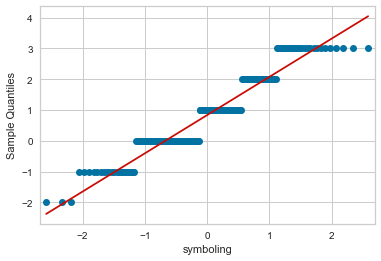

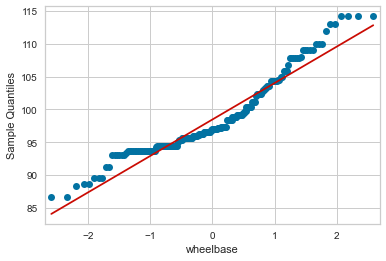

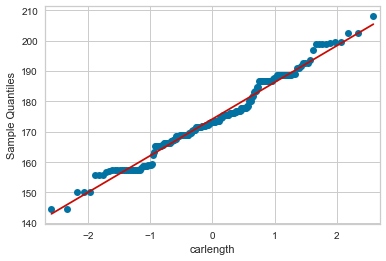

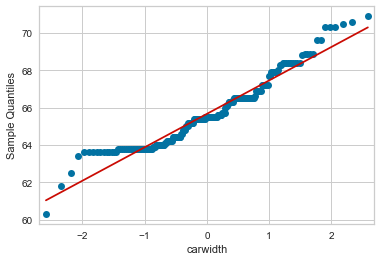

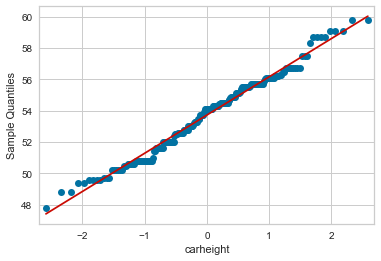

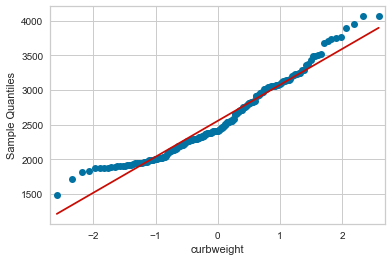

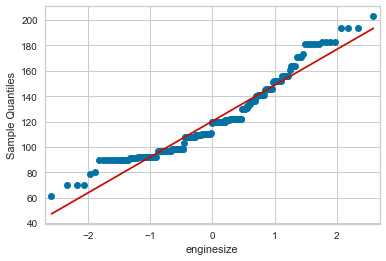

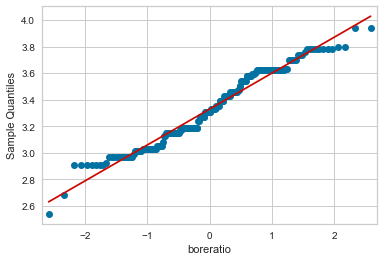

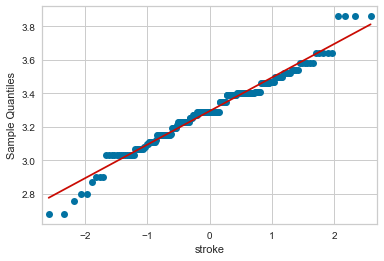

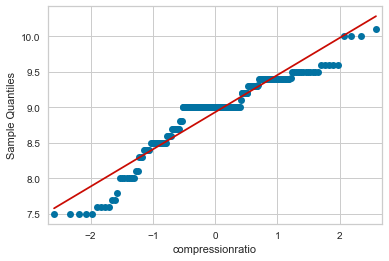

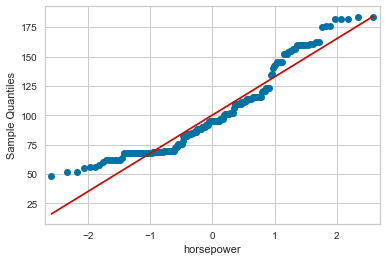

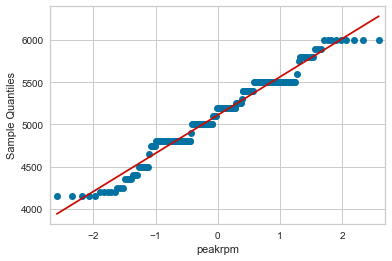

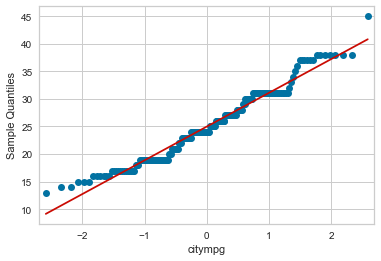

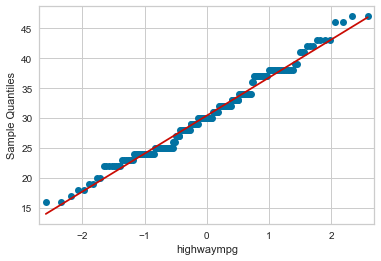

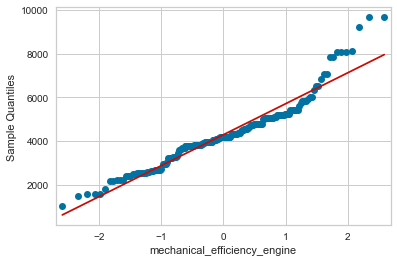

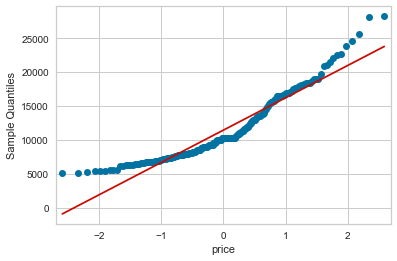

In [26]:
import numpy
import pylab
import statsmodels.api as sm
for i in num_df:
    sm.qqplot(num_df_ini[i], line='s')
    plt.xlabel(i)
    pylab.show()

Observation:-

1. As we can see apart from symboling,mechanical_efficiency_engine, all other features are gaussian distributed. While target feature(price) is semi-gaussian distributed.

In [27]:
num_df_ini['mechanical_efficiency_engine'] = np.log10(num_df_ini['mechanical_efficiency_engine'])

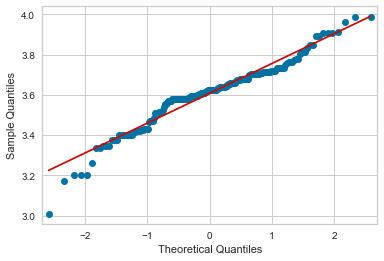

In [28]:
sm.qqplot(num_df_ini['mechanical_efficiency_engine'], line='s')
pylab.show()

In [29]:
num_df_ini['price'] = np.log10(num_df_ini['price'])

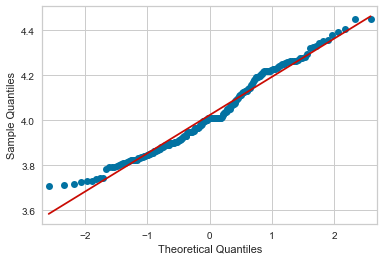

In [30]:
sm.qqplot(num_df_ini['price'], line='s')
pylab.show()

Price and mechanical features have been normally distributed.

<h5> Now checking for multicollinearity between features

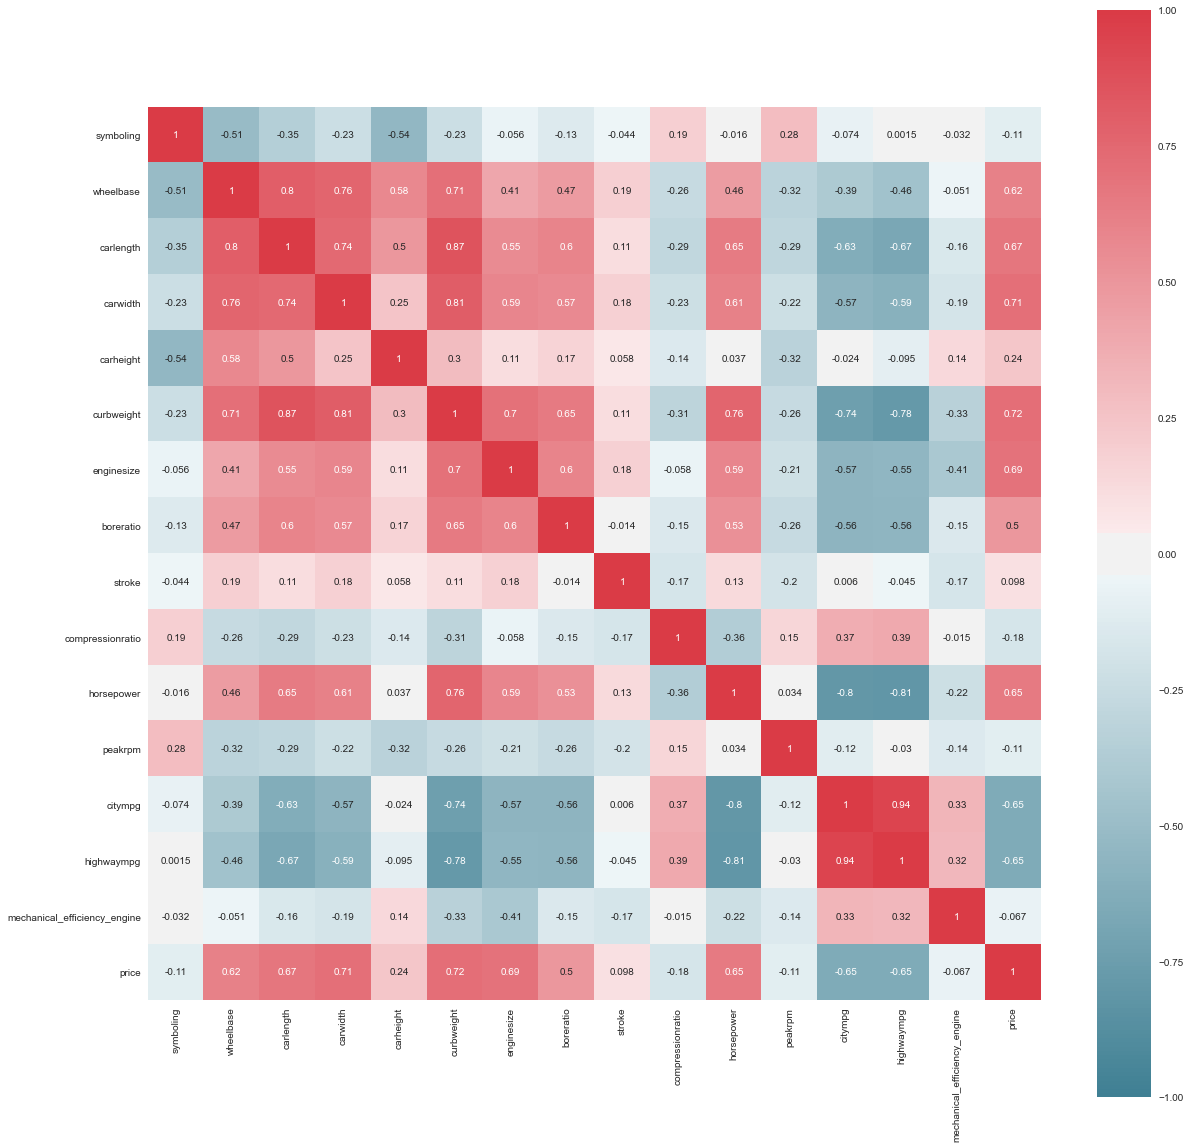

In [31]:
f, ax = plt.subplots(figsize=(20, 20))
corr = num_df_ini.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There are many features with multicollinearity, we will remove them below

<h5>Removing all those features which have multicollinearity above 0.85

In [32]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if ((corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                   
    return dataset

Now these are the features which are remaining after removing features with high multi collinearity

In [33]:
correlation(num_df_ini, 0.8).head().columns

Index(['symboling', 'wheelbase', 'carwidth', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'mechanical_efficiency_engine', 'price'],
      dtype='object')

<h5>Removing those features which have very low correlation with target feature.

In [34]:
del num_df_ini['symboling']
del num_df_ini['stroke']
del num_df_ini['compressionratio']
del num_df_ini['peakrpm']
del num_df_ini['mechanical_efficiency_engine']

In [35]:
del num_df_ini['carheight']

In [36]:
num_df_ini.head()

,wheelbase,carwidth,enginesize,boreratio,horsepower,citympg,price
0,88.6,64.1,130,3.47,111,21,4.130173
1,88.6,64.1,130,3.47,111,21,4.217484
2,94.5,65.5,152,2.68,154,19,4.217484
3,99.8,66.2,109,3.19,102,24,4.144574
4,99.4,66.4,136,3.19,115,18,4.241795


Finally out correlation matrix looks like this with no multicollinearity and selected features with only high correlations with target features

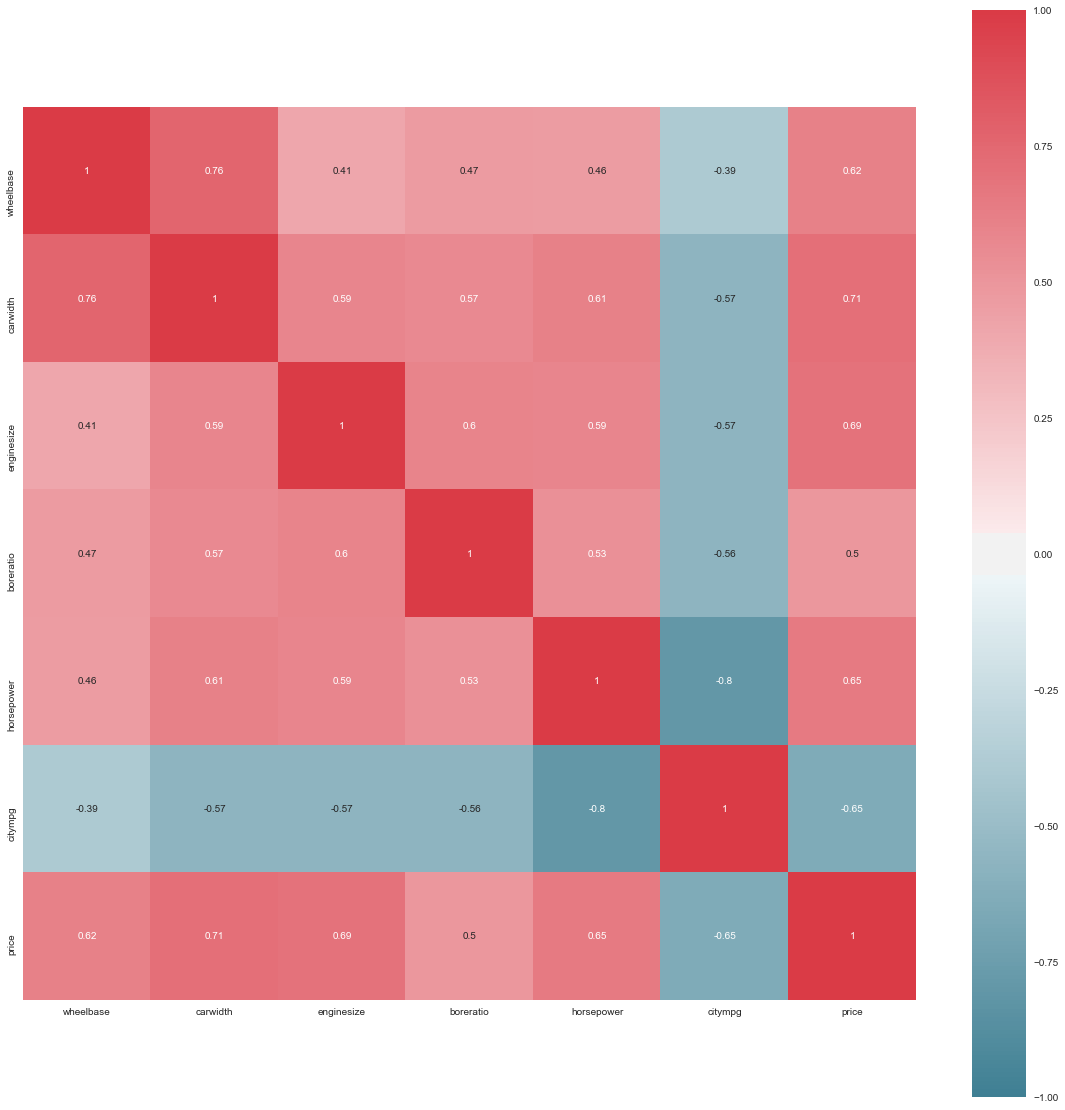

In [37]:
f, ax = plt.subplots(figsize=(20, 20))
corr = num_df_ini.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h5> Selecting important features using recursive feature elimination

In [38]:
colnames = categ_df_encoded.columns

In [39]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [40]:
from sklearn.feature_selection import RFE
ranks = {}
lr = RandomForestRegressor()
lr.fit(categ_df_encoded,num_df_ini['price'])
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(categ_df_encoded,num_df_ini['price'])
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [41]:
ranks["RFE"]

{'doornumber': 0.25,
 'enginetype': 0.5,
 'fueltype': 0.12,
 'carbody': 0.62,
 'cylindernumber': 0.88,
 'enginelocation': 0.0,
 'drivewheel': 0.75,
 'fuelsystem': 1.0,
 'aspiration': 0.38}

Selecting features with only high importance as given by recursive feature elimination

In [42]:
categ_df_encoded_fs = pd.DataFrame([])
categ_df_encoded_fs = categ_df_encoded[['fuelsystem','cylindernumber','drivewheel','enginetype','carbody']]

In [43]:
final = pd.concat([categ_df_encoded_fs, num_df_ini], axis = 1)

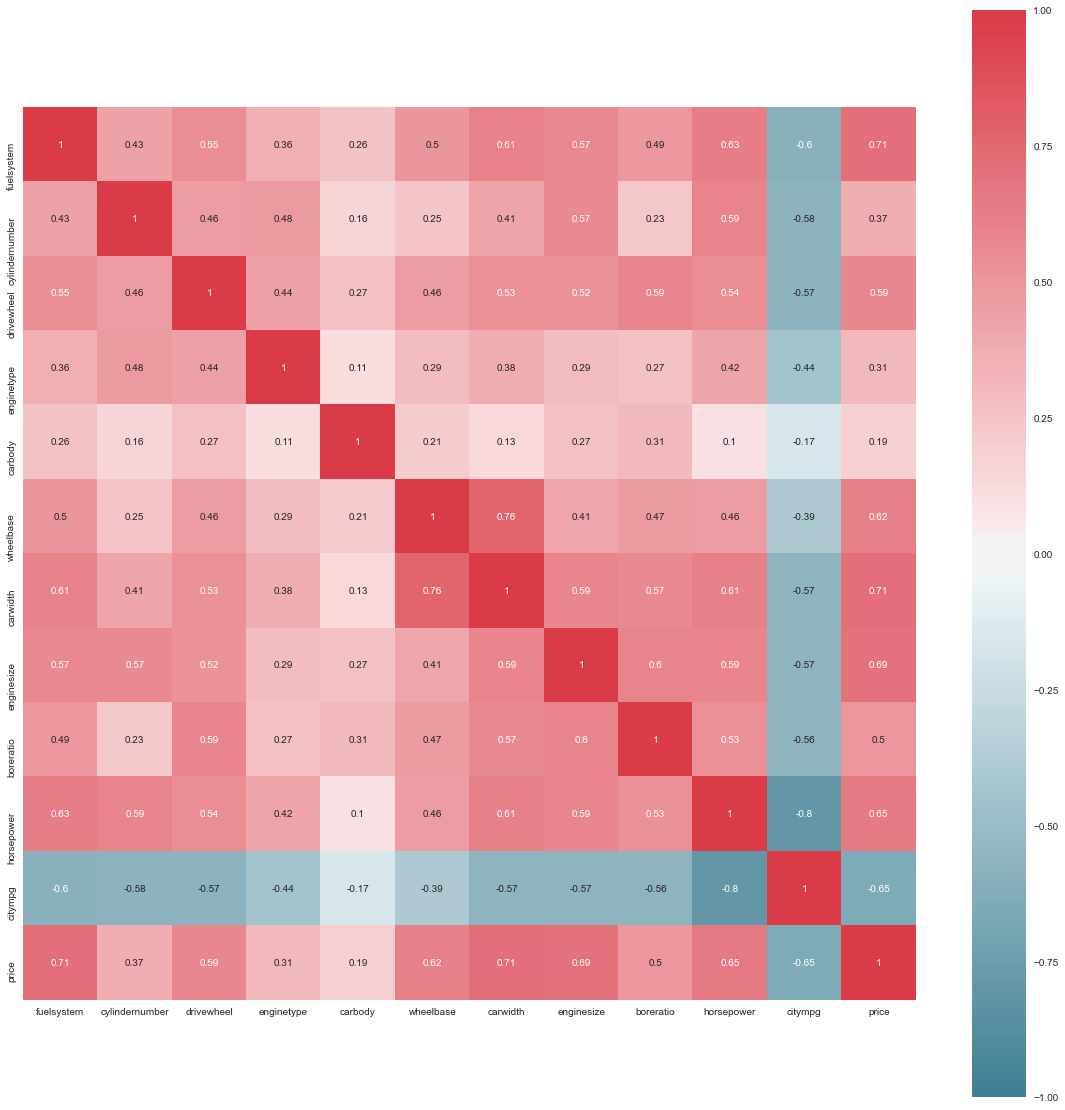

In [44]:
f, ax = plt.subplots(figsize=(20, 20))
corr = final.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [45]:
del final['carbody']

<h5> Using mathematical feature engineering techniques

In [54]:
def feature_engg_log10():
    corr_log10 = {}
    for i in final:
        final[i] = np.log10(final[i])
        plt.scatter(final[i],final['price'])
        final[i].plot.density()
        plt.xlabel(i)
        plt.show()
        corr_log10[i] = final[i].corr(final['price'])
        print("correlation of {} with price".format(i),final[i].corr(final['price']))
    result = pd.DataFrame([])
    result['column names'] = list(corr_log10.keys())
    result['corr value'] = list(corr_log10.values())
    result = result.sort_values(['corr value'], ascending=False)
    print(result)

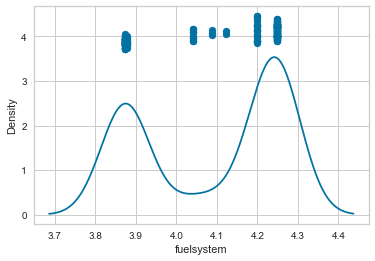

correlation of fuelsystem with price 0.7180455992576866


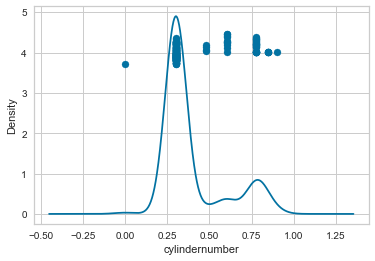

correlation of cylindernumber with price 0.41306380931472153


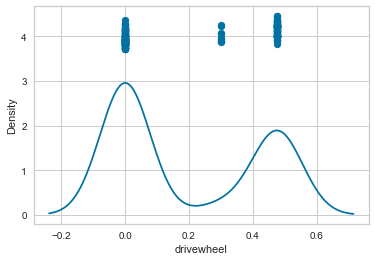

correlation of drivewheel with price 0.5829839031096881


C:\Python\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


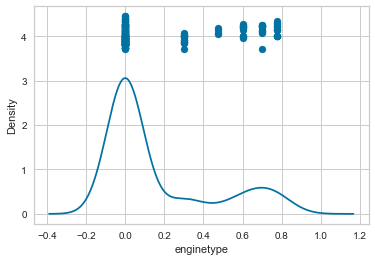

correlation of enginetype with price 0.2983048778031734


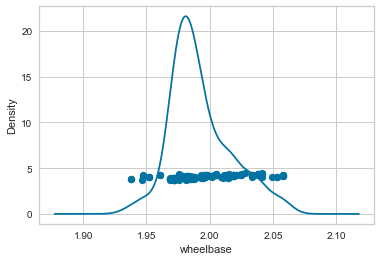

correlation of wheelbase with price 0.6185813436783044


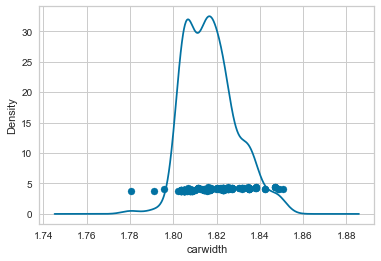

correlation of carwidth with price 0.7104041964447558


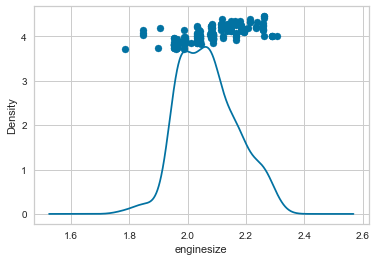

correlation of enginesize with price 0.7032574390534917


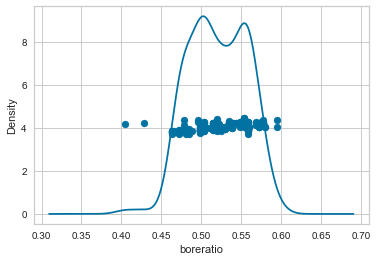

correlation of boreratio with price 0.4993023546885637


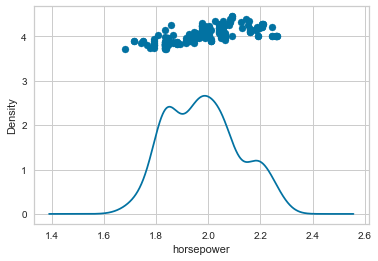

correlation of horsepower with price 0.7011525479414359


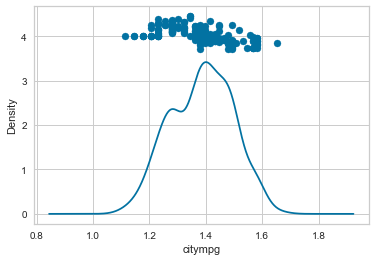

correlation of citympg with price -0.6344394826649589


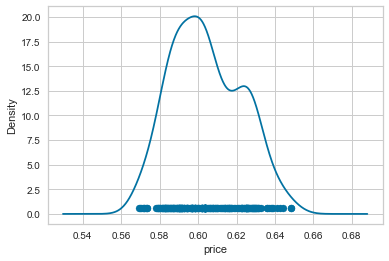

correlation of price with price 1.0
      column names  corr value
10           price    1.000000
0       fuelsystem    0.718046
5         carwidth    0.710404
6       enginesize    0.703257
8       horsepower    0.701153
4        wheelbase    0.618581
2       drivewheel    0.582984
7        boreratio    0.499302
1   cylindernumber    0.413064
3       enginetype    0.298305
9          citympg   -0.634439


In [55]:
feature_engg_log10()

In [76]:
final['horsepower'] = np.log10(final['horsepower'])
final['cylindernumber'] = np.log10(final['cylindernumber'])

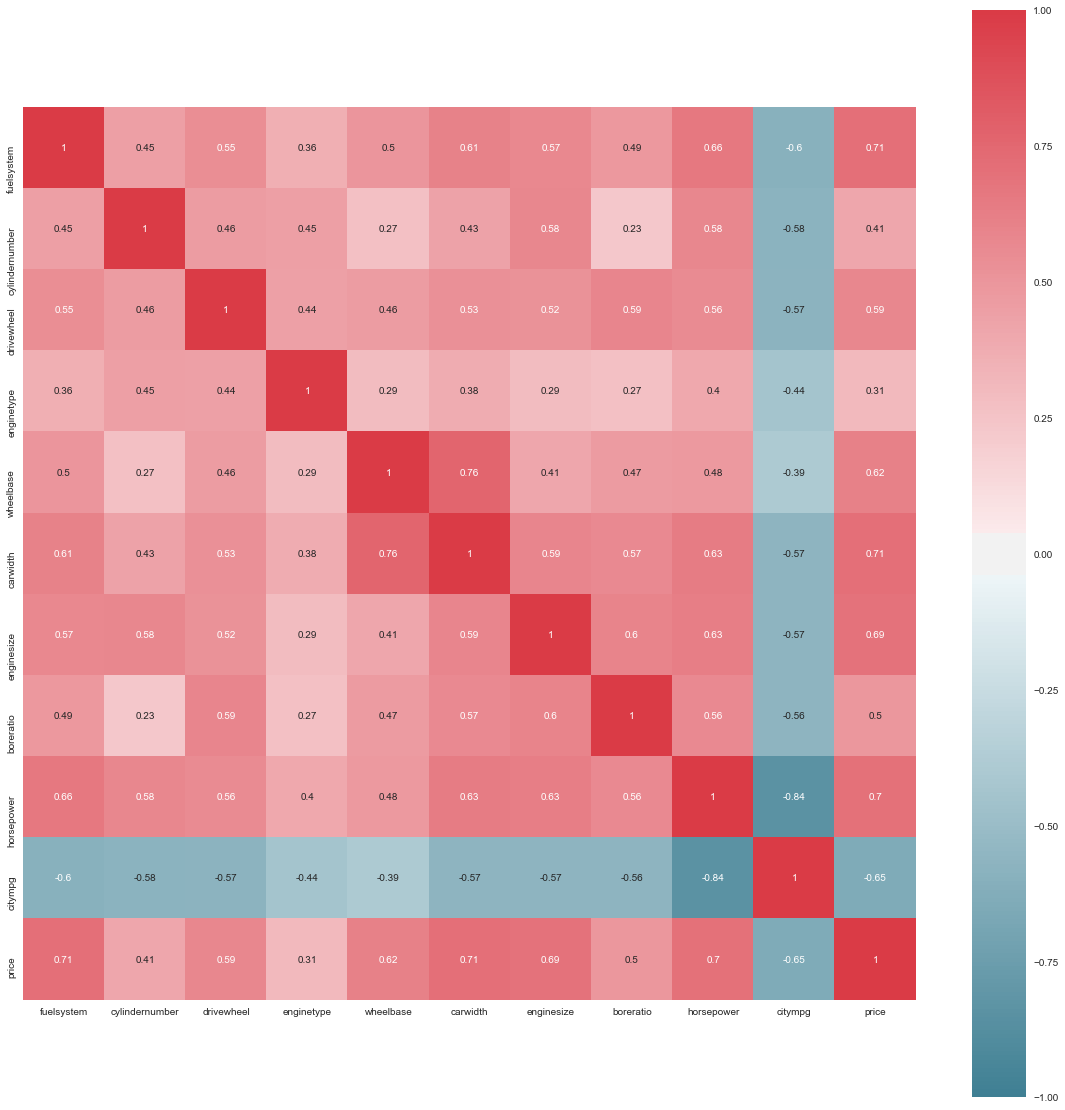

In [77]:
f, ax = plt.subplots(figsize=(20, 20))
corr = final.corr()
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [56]:
def feature_engg_squared():
    squared = {}
    for i in final:
        final[i] = (final[i]**2)
        final[i].fillna(final[i].median())
        np.nan_to_num(final[i])
        plt.scatter(final[i], final['price'])
        final[i].plot.density()
        plt.xlabel(i)
        plt.show()
        squared[i] = final[i].corr(final['price'])
        print("correlation of {} with price".format(i),final[i].corr(final['price']))
    result = pd.DataFrame([])
    result['column names'] = list(squared.keys())
    result['corr value'] = list(squared.values())
    result = result.sort_values(['corr value'], ascending=False)
    print(result)

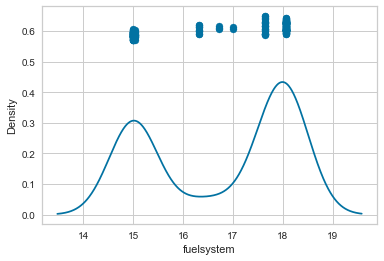

correlation of fuelsystem with price 0.722755819705577


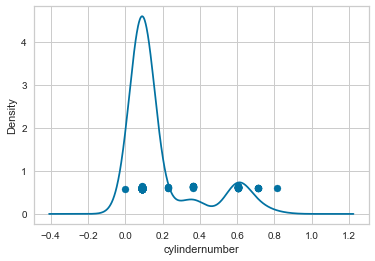

correlation of cylindernumber with price 0.3812850440838325


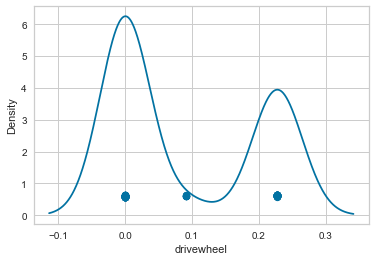

correlation of drivewheel with price 0.5867542389320708


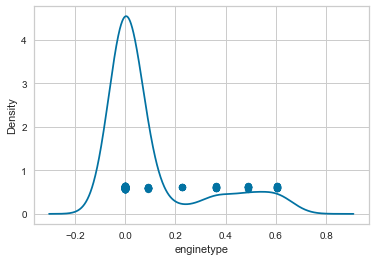

correlation of enginetype with price 0.31915127041484354


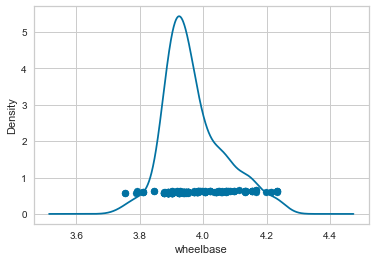

correlation of wheelbase with price 0.6184911754903432


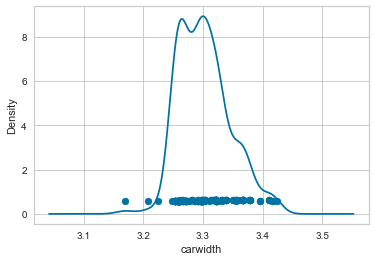

correlation of carwidth with price 0.7115781504782782


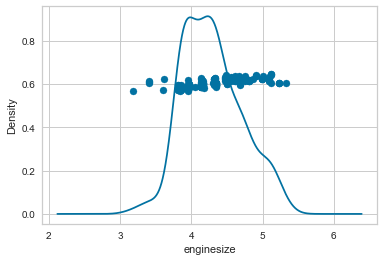

correlation of enginesize with price 0.7040215139000799


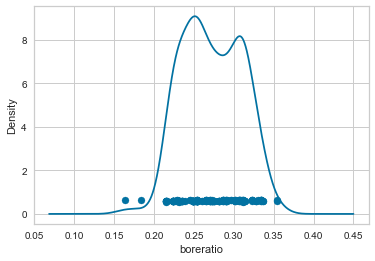

correlation of boreratio with price 0.50550140805611


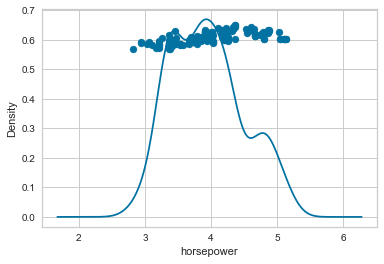

correlation of horsepower with price 0.6972574628188851


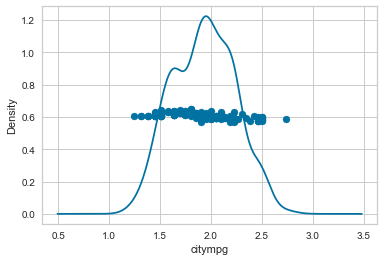

correlation of citympg with price -0.6468760634759679


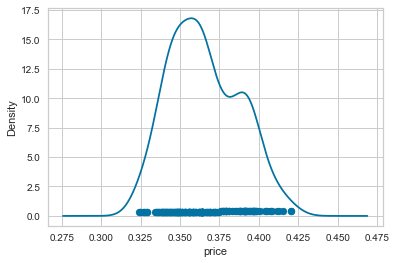

correlation of price with price 1.0
      column names  corr value
10           price    1.000000
0       fuelsystem    0.722756
5         carwidth    0.711578
6       enginesize    0.704022
8       horsepower    0.697257
4        wheelbase    0.618491
2       drivewheel    0.586754
7        boreratio    0.505501
1   cylindernumber    0.381285
3       enginetype    0.319151
9          citympg   -0.646876


In [57]:
feature_engg_squared()

In [58]:
def feature_engg_square_root():
    squared_root = {}
    for i in final:
        final[i] = np.sqrt(final[i])
        plt.scatter(final[i], final['price'])
        final[i].plot.density()
        plt.xlabel(i)
        plt.show()
        squared_root[i] = final[i].corr(final['price'])
        print("correlation of {} with price".format(i),final[i].corr(final['price']))
    result = pd.DataFrame([])
    result['column names'] = list(squared_root.keys())
    result['corr value'] = list(squared_root.values())
    result = result.sort_values(['corr value'], ascending=False)
    print(result)

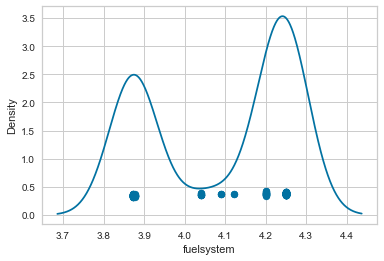

correlation of fuelsystem with price 0.719640348471152


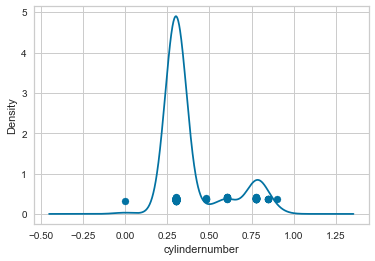

correlation of cylindernumber with price 0.41310183893831476


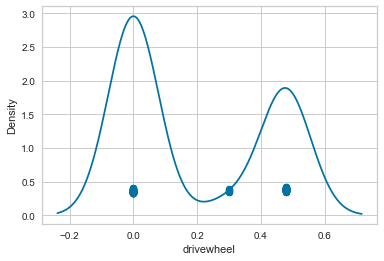

correlation of drivewheel with price 0.5832233819568411


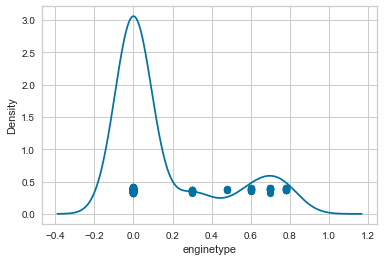

correlation of enginetype with price 0.29923079150931736


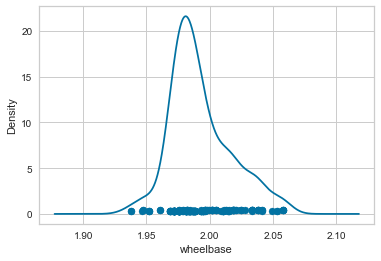

correlation of wheelbase with price 0.6186993650436956


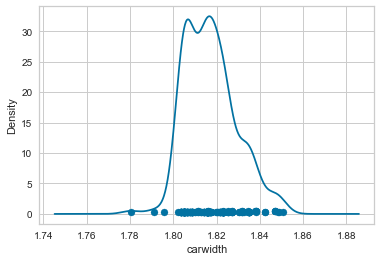

correlation of carwidth with price 0.71095752451156


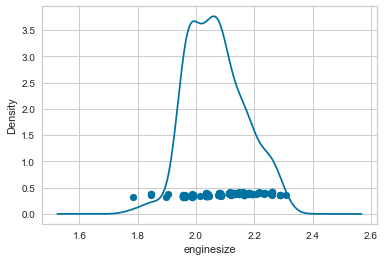

correlation of enginesize with price 0.7037997462655192


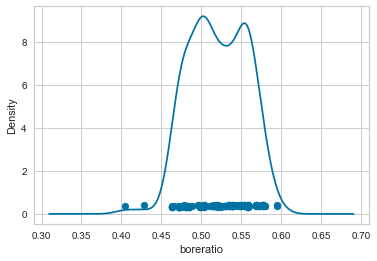

correlation of boreratio with price 0.5008402088788545


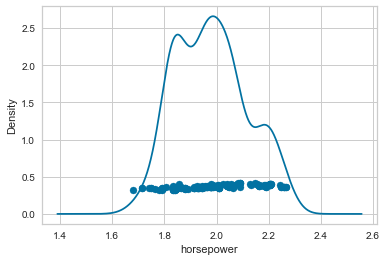

correlation of horsepower with price 0.7025234332550798


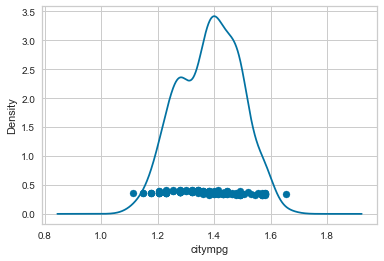

correlation of citympg with price -0.635967625666848


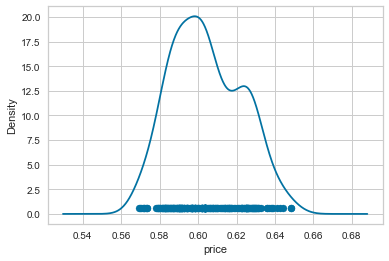

correlation of price with price 1.0
      column names  corr value
10           price    1.000000
0       fuelsystem    0.719640
5         carwidth    0.710958
6       enginesize    0.703800
8       horsepower    0.702523
4        wheelbase    0.618699
2       drivewheel    0.583223
7        boreratio    0.500840
1   cylindernumber    0.413102
3       enginetype    0.299231
9          citympg   -0.635968


In [59]:
feature_engg_square_root()

In [60]:
def feature_engg_cube():
    cube = {}
    for i in final:
        final[i] = (final[i]**3)
        final[i].fillna(final[i].median())
        plt.scatter(final[i], final['price'])
        final[i].plot.density()
        plt.xlabel(i)
        plt.show()
        cube[i] = final[i].corr(final['price'])
        print("correlation of {} with price".format(i),final[i].corr(final['price']))
    result = pd.DataFrame([])
    result['column names'] = list(cube.keys())
    result['corr value'] = list(cube.values())
    result = result.sort_values(['corr value'], ascending=False)
    print(result)

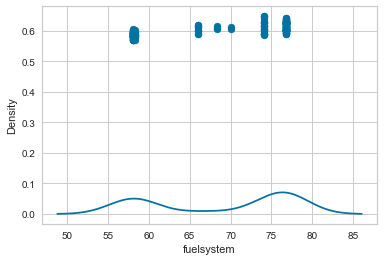

correlation of fuelsystem with price 0.7220882194339231


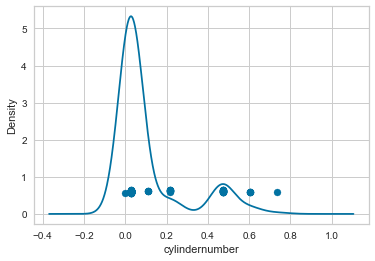

correlation of cylindernumber with price 0.3516164383832452


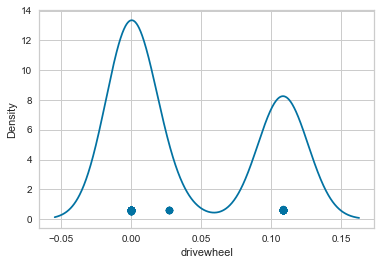

correlation of drivewheel with price 0.5857006597133286


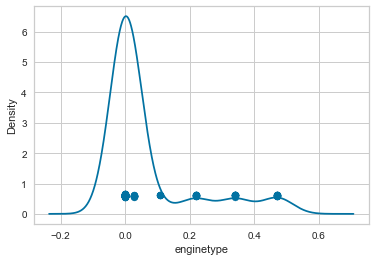

correlation of enginetype with price 0.3162784420075511


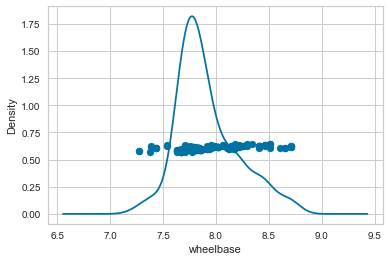

correlation of wheelbase with price 0.6180272660870726


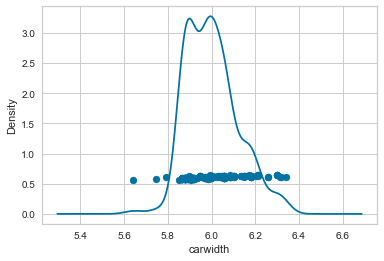

correlation of carwidth with price 0.7108833218311797


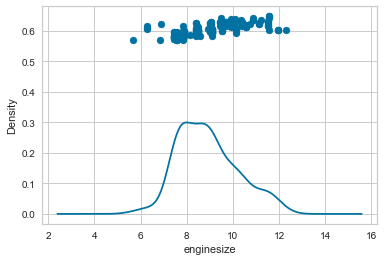

correlation of enginesize with price 0.7019007775956949


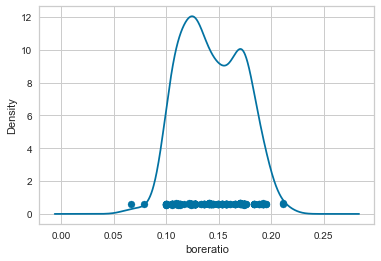

correlation of boreratio with price 0.5048704011960246


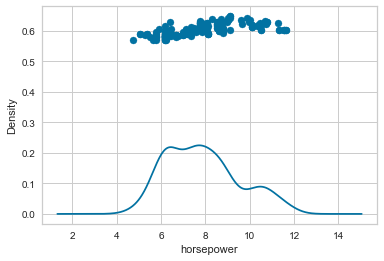

correlation of horsepower with price 0.6874298275306452


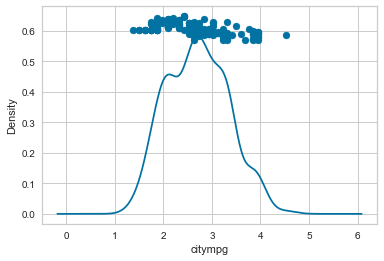

correlation of citympg with price -0.6517946818810538


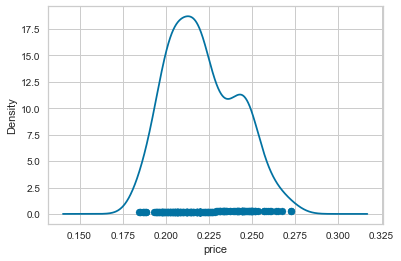

correlation of price with price 0.9999999999999998
      column names  corr value
10           price    1.000000
0       fuelsystem    0.722088
5         carwidth    0.710883
6       enginesize    0.701901
8       horsepower    0.687430
4        wheelbase    0.618027
2       drivewheel    0.585701
7        boreratio    0.504870
1   cylindernumber    0.351616
3       enginetype    0.316278
9          citympg   -0.651795


In [61]:
feature_engg_cube()

Only log transformation was use to increase correlation between independent and dependent features

<h5> Standarizing the dataset

In [78]:
final_std = final.copy()
from sklearn.preprocessing import StandardScaler
my_created_transformer = StandardScaler()
for i in final:
    my_created_transformer.fit(final[i].values.reshape(-1, 1))
    final_std[i] = my_created_transformer.transform(final[i].values.reshape(-1, 1))

In [79]:
final_std.head()

,fuelsystem,cylindernumber,drivewheel,enginetype,wheelbase,carwidth,enginesize,boreratio,horsepower,citympg,price
0,0.937668,-0.493359,1.273262,1.364235,-1.774038,-0.873343,0.341957,0.519071,0.487790,-0.651000,0.629518
1,0.937668,-0.493359,1.273262,1.364235,-1.774038,-0.873343,0.341957,0.519071,0.487790,-0.651000,1.144271
2,0.937668,2.116738,1.273262,2.621171,-0.712336,-0.092504,1.119682,-2.404880,1.541146,-0.977695,1.144271
3,0.937668,-0.493359,-0.823274,-0.521168,0.241396,0.297916,-0.400416,-0.517266,0.215759,-0.160957,0.714423
4,0.937668,1.153429,0.224994,-0.521168,0.169416,0.409465,0.554064,-0.517266,0.601682,-1.141043,1.287602


In [80]:
Y = final_std['price']
X = final_std.drop('price',axis = 1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

<h5> Using random forest regressor as model

In [82]:
def rfr_model( X, y):
    # Perform Grid-Search
    gsc = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions={'max_depth': range(1,7),'n_estimators': (10, 50, 100, 1000),},cv=5, scoring='r2', verbose=0,n_jobs=-1)
    rand_result = gsc.fit(X, y)
    best_params = rand_result.best_params_
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=5, scoring='r2')
    return best_params

In [83]:
rfr_model(X_train,y_train)

{'n_estimators': 100, 'max_depth': 5}

In [84]:
# Fitting data on model and Checking error, score given by model
rfr = RandomForestRegressor(max_depth= 5, n_estimators= 100 ,random_state=False, verbose=False)
rfr.fit(X_train,y_train)
ypred2 = rfr.predict(X_test)
score2 = r2_score(y_test, ypred2)
print('test score for random forest is -',score2)

test score for random forest is - 0.8400688841892355


In [85]:
Xpredt = rfr.predict(X_train)
scoret = r2_score(y_train, Xpredt)
print('train score for random forest is -',scoret)

train score for random forest is - 0.9292824061808356


Feature-name: fuelsystem, Score:0.06998391503227744
--------------------------------------------------
Feature-name: cylindernumber, Score:0.005316032479899132
--------------------------------------------------
Feature-name: drivewheel, Score:0.0028914686878262
--------------------------------------------------
Feature-name: enginetype, Score:0.006799324482259058
--------------------------------------------------
Feature-name: wheelbase, Score:0.09456842066315703
--------------------------------------------------
Feature-name: carwidth, Score:0.0948418466791137
--------------------------------------------------
Feature-name: enginesize, Score:0.17008469246714034
--------------------------------------------------
Feature-name: boreratio, Score:0.01669553883732905
--------------------------------------------------
Feature-name: horsepower, Score:0.5031125881411317
--------------------------------------------------
Feature-name: citympg, Score:0.035706172529866444
------------------------

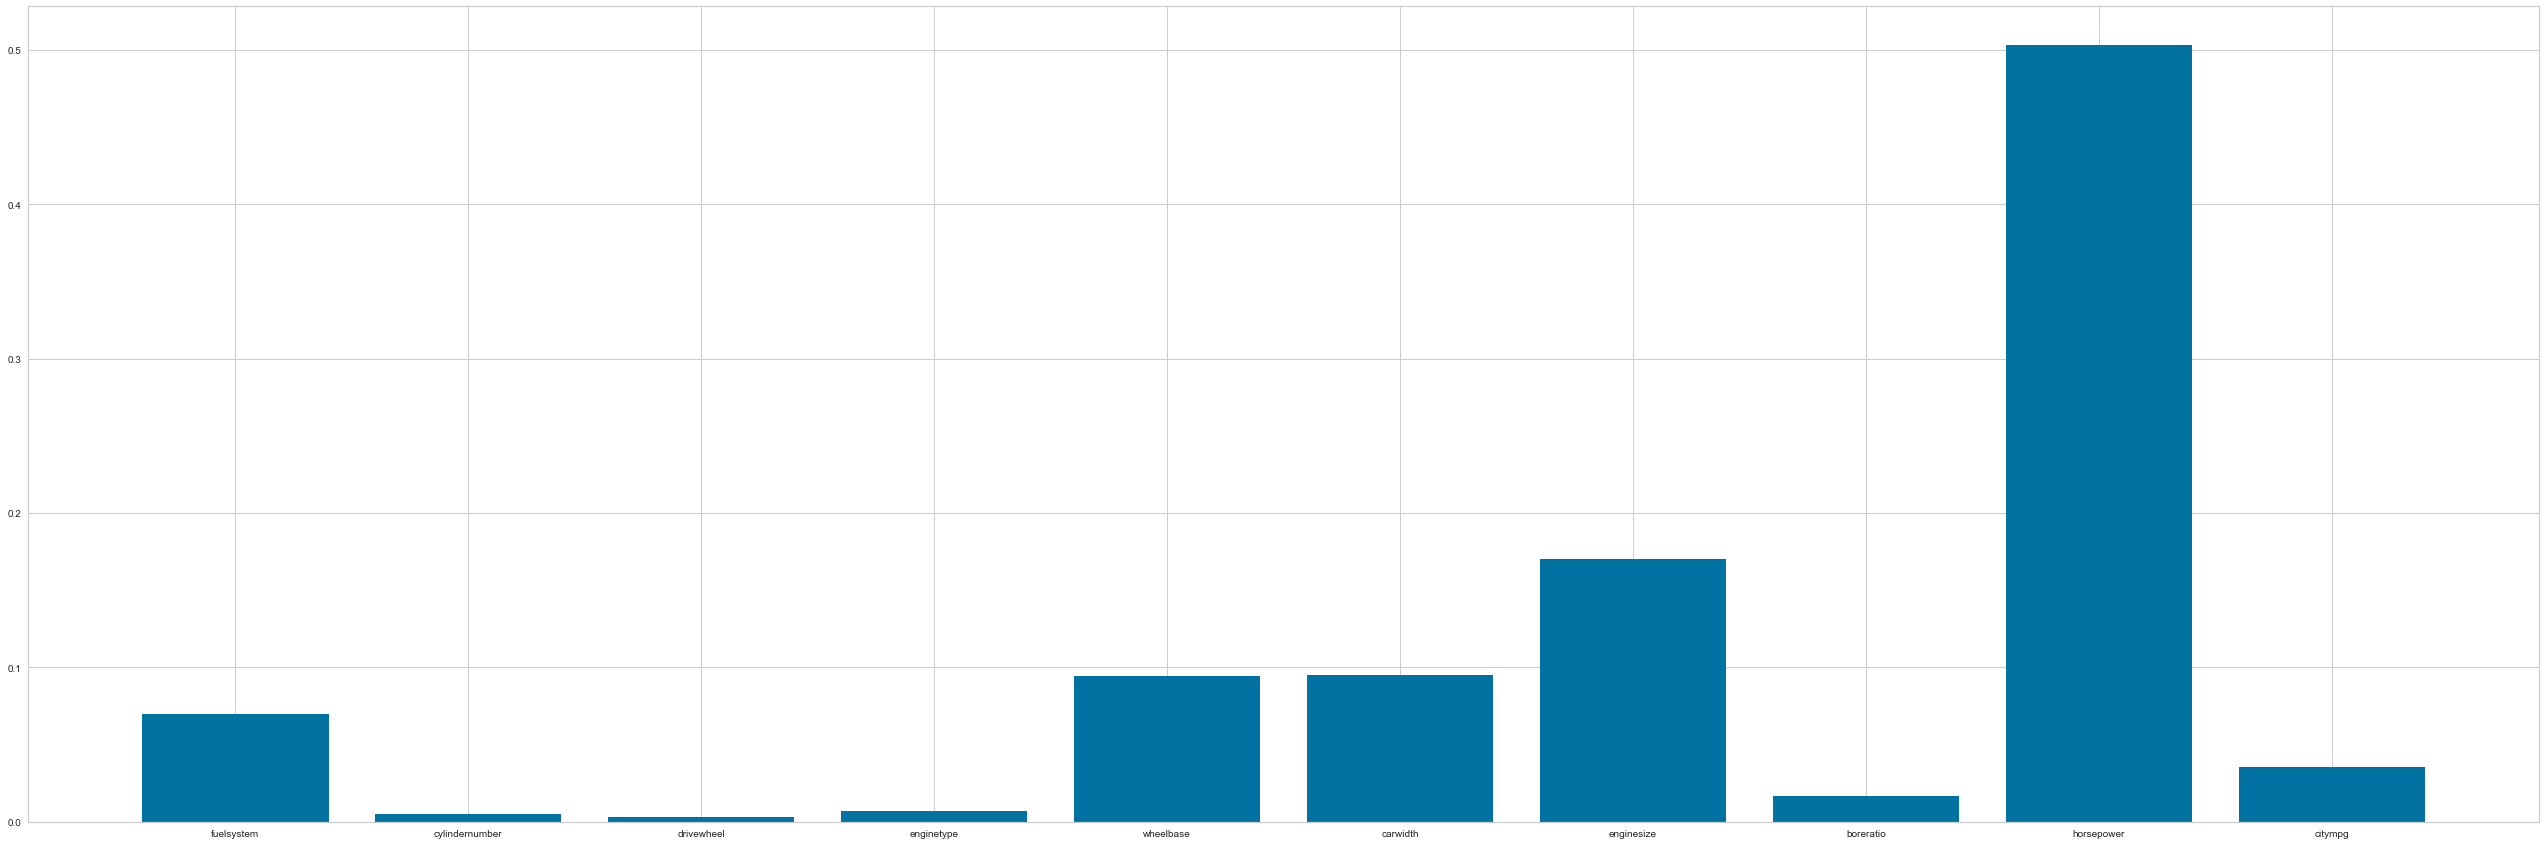

In [86]:
# Checking feature importance given by model
importan = rfr.feature_importances_
for i,v in enumerate(importan):
    print('Feature-name: {}, Score:{}'.format(X_train.columns[i],v))
    print('--------------------------------------------------')
# plot feature importance
plt.figure(figsize = (45,15))
plt.bar(X_train.columns, importan)
plt.show()

Horse power by far seems the most contributing feature to the model.

In [87]:
def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    filename = 'tree.png'
    graph.write_png(filename)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [88]:
for i in range(len(rfr.estimators_)):
    save_decision_trees_as_png(rfr.estimators_[i], i, X_train.columns, y_train.values)

Decision Tree 1 saved as png file
Decision Tree 2 saved as png file
Decision Tree 3 saved as png file
Decision Tree 4 saved as png file
Decision Tree 5 saved as png file
Decision Tree 6 saved as png file
Decision Tree 7 saved as png file
Decision Tree 8 saved as png file
Decision Tree 9 saved as png file
Decision Tree 10 saved as png file
Decision Tree 11 saved as png file
Decision Tree 12 saved as png file
Decision Tree 13 saved as png file
Decision Tree 14 saved as png file
Decision Tree 15 saved as png file
Decision Tree 16 saved as png file
Decision Tree 17 saved as png file
Decision Tree 18 saved as png file
Decision Tree 19 saved as png file
Decision Tree 20 saved as png file
Decision Tree 21 saved as png file
Decision Tree 22 saved as png file
Decision Tree 23 saved as png file
Decision Tree 24 saved as png file
Decision Tree 25 saved as png file
Decision Tree 26 saved as png file
Decision Tree 27 saved as png file
Decision Tree 28 saved as png file
Decision Tree 29 saved as png

In [89]:
images = [ Image.open(f) for f in glob(r'C:\Users\admin\tree.png') ]

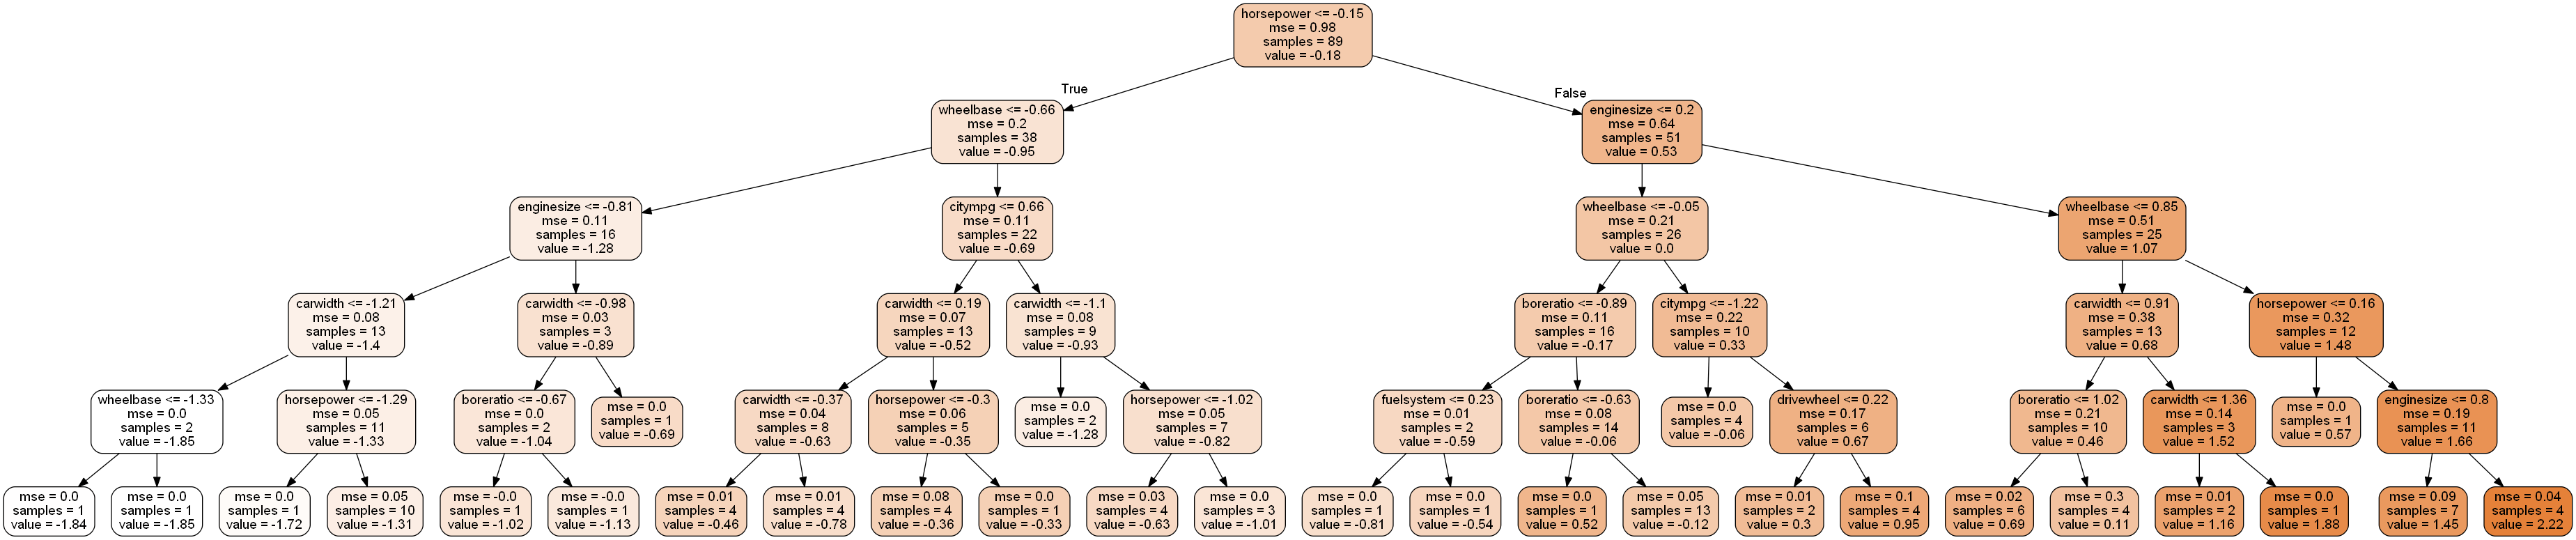

In [90]:
from IPython.display import Image
Image(filename='tree.png')

Text(0.5, 1.0, 'Predicted vs original car price data points by randomforest regressor')

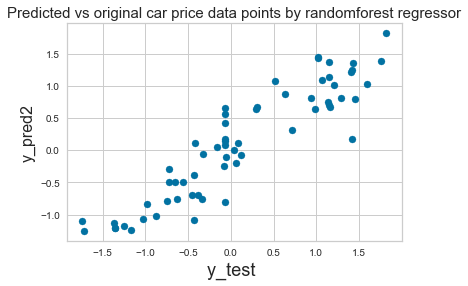

In [94]:
fig = plt.figure()
plt.scatter(y_test, ypred2)  
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)
plt.title("Predicted vs original car price data points by randomforest regressor", fontsize=15)

As we can see the points are quite near to line y = x, representing majority predictions.

<h5>Equation for a car price prediction by random forest regressor is:-
<h5>car_price = fuelsystem * 0.0699  + cylindernumber * 0.00531 + drivewheel * 0.00289 + enginetype * 0.00679 + wheelbase * 0.0945 + carwidth * 0.09484 +  enginesize * 0.0759 + boreratio *  + boreratio *  0.016695 +  horsepower * 0.503112 + citympg * 0.035706

As random forest model gives 84 % score on test dataset, this models is suitable to predict car prices.